<a href="https://colab.research.google.com/github/sudipsaha04/Heart_disease_dataset_train-_by_decessiontree_and_KNN/blob/master/Healthcare_dataset_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/Heart.csv"
data = pd.read_csv(url)

In [ ]:
print(data.head()) #Display the first 5 rows

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [ ]:
print(data.shape) # Display the shape of the dataset

(303, 15)


In [ ]:
print(data.info()) # Display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


In [ ]:
print(data.describe()) # Display summary statistics of the dataset

       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003 

In [ ]:
categorical_features = ['ChestPain', 'Thal', 'AHD']
data = data.drop(categorical_features[:-1], axis=1)  # Drop 'ChestPain' and 'Thal', keep 'AHD'

In [ ]:
# Convert the target variable 'AHD' to binary format
data['AHD'] = data['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Handle missing values using SimpleImputer for numeric data
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
# Prepare the features and target variable
X = data_imputed.drop('AHD', axis=1)  # Features
y = data_imputed['AHD']  # Target variable

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, random_state=42)

In [ ]:
# Display the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}")

Training set shape: (300, 12)


In [ ]:
print("Training labels shape:", y_train.shape)

Training labels shape: (300,)


In [ ]:

print(f"Testing set shape: {X_test.shape}")

Testing set shape: (3, 12)


In [ ]:
print("Test labels shape:", y_test.shape)

Test labels shape: (3,)


In [ ]:

# Experiment with hyperparameters
# Decision Tree: limiting the depth of the tree to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# KNN: experimenting with a different number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
dt_model.fit(X_train, y_train) # Train the Decision Tree model


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
knn_model.fit(X_train, y_train) # Train the KNN model

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set using both models
dt_predictions = dt_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)


In [ ]:
# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)




In [ ]:
print("\nDecision Tree Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)



Decision Tree Performance:
Accuracy: 0.3333333333333333
Precision: 0.5
Recall: 0.5
F1-Score: 0.5


In [ ]:
print("\nK-Nearest Neighbors Performance:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-Score:", knn_f1)




K-Nearest Neighbors Performance:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1-Score: 0.6666666666666666


In [ ]:
# Determine which model performs better in terms of F1-score
if dt_f1 > knn_f1:
    print("\nThe Decision Tree model performs better in terms of F1-score.")
else:
    print("\nThe K-Nearest Neighbors model performs better in terms of F1-score.")


The K-Nearest Neighbors model performs better in terms of F1-score.


In [ ]:
# Create a DataFrame for model performance comparison
performance_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1]
})

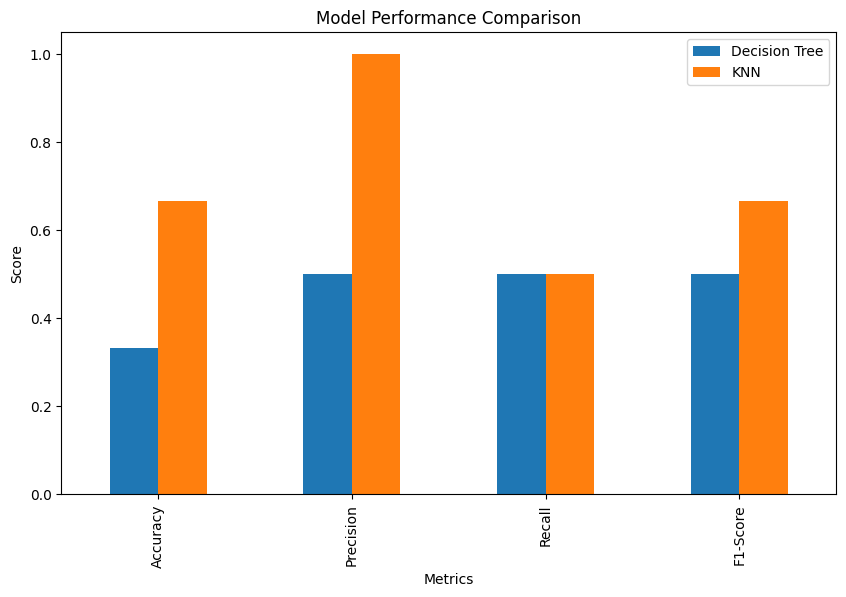

In [ ]:
# Plot a bar chart comparing model performance
performance_df.plot(x='Metrics', kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

